In [36]:
import pandas as pd
import glob
import pickle
import comex_algoritms as cm


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [37]:
def _read_rank_list(filename):
    with open(filename, 'rb') as f:
        rank_list = pickle.load(f)
        
    rank_list = pd.DataFrame(rank_list)
    return rank_list

def plot_heatmap(plot_df):
    # Create a heatmap using seaborn
    plt.figure(figsize=(25, 18))
#     sns.heatmap(plot_df, cmap='icefire')

    original_cmap = 'RdYlBu'
    # Get the colormap object
    cmap = matplotlib.colormaps[original_cmap]
    # Create an inverse colormap
    inverse_cmap = cmap.reversed()    
    
    sns.heatmap(plot_df, cmap=inverse_cmap, xticklabels=False, yticklabels=False)
    
    # Display the heatmap
    plt.title('Correlation Heatmap')
    plt.show()

In [21]:
# Get all CSV files in the folder starting with "rank"
pickle_files = glob.glob("temp_files/rank_list_*.pickle")
# Concatenate all DataFrames into a single DataFrame
rank_list = pd.concat(_read_rank_list(f) for f in pickle_files)

rank_list.reset_index(inplace=True, drop=True)
rank_list['cut_round'] = (rank_list.index // 100) + 1 

print(rank_list.shape)

(1985, 7)


In [22]:
sparse = cm._rank_list_to_sparse(rank_list)

plot_df = pd.DataFrame(columns=sparse.columns, index=sparse.columns)
plot_df.fillna(0, inplace=True)

,col_0,col_1,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,...,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_7,col_8,col_9
col_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
col_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
col_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
col_11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
col_12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
col_69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
col_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
col_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


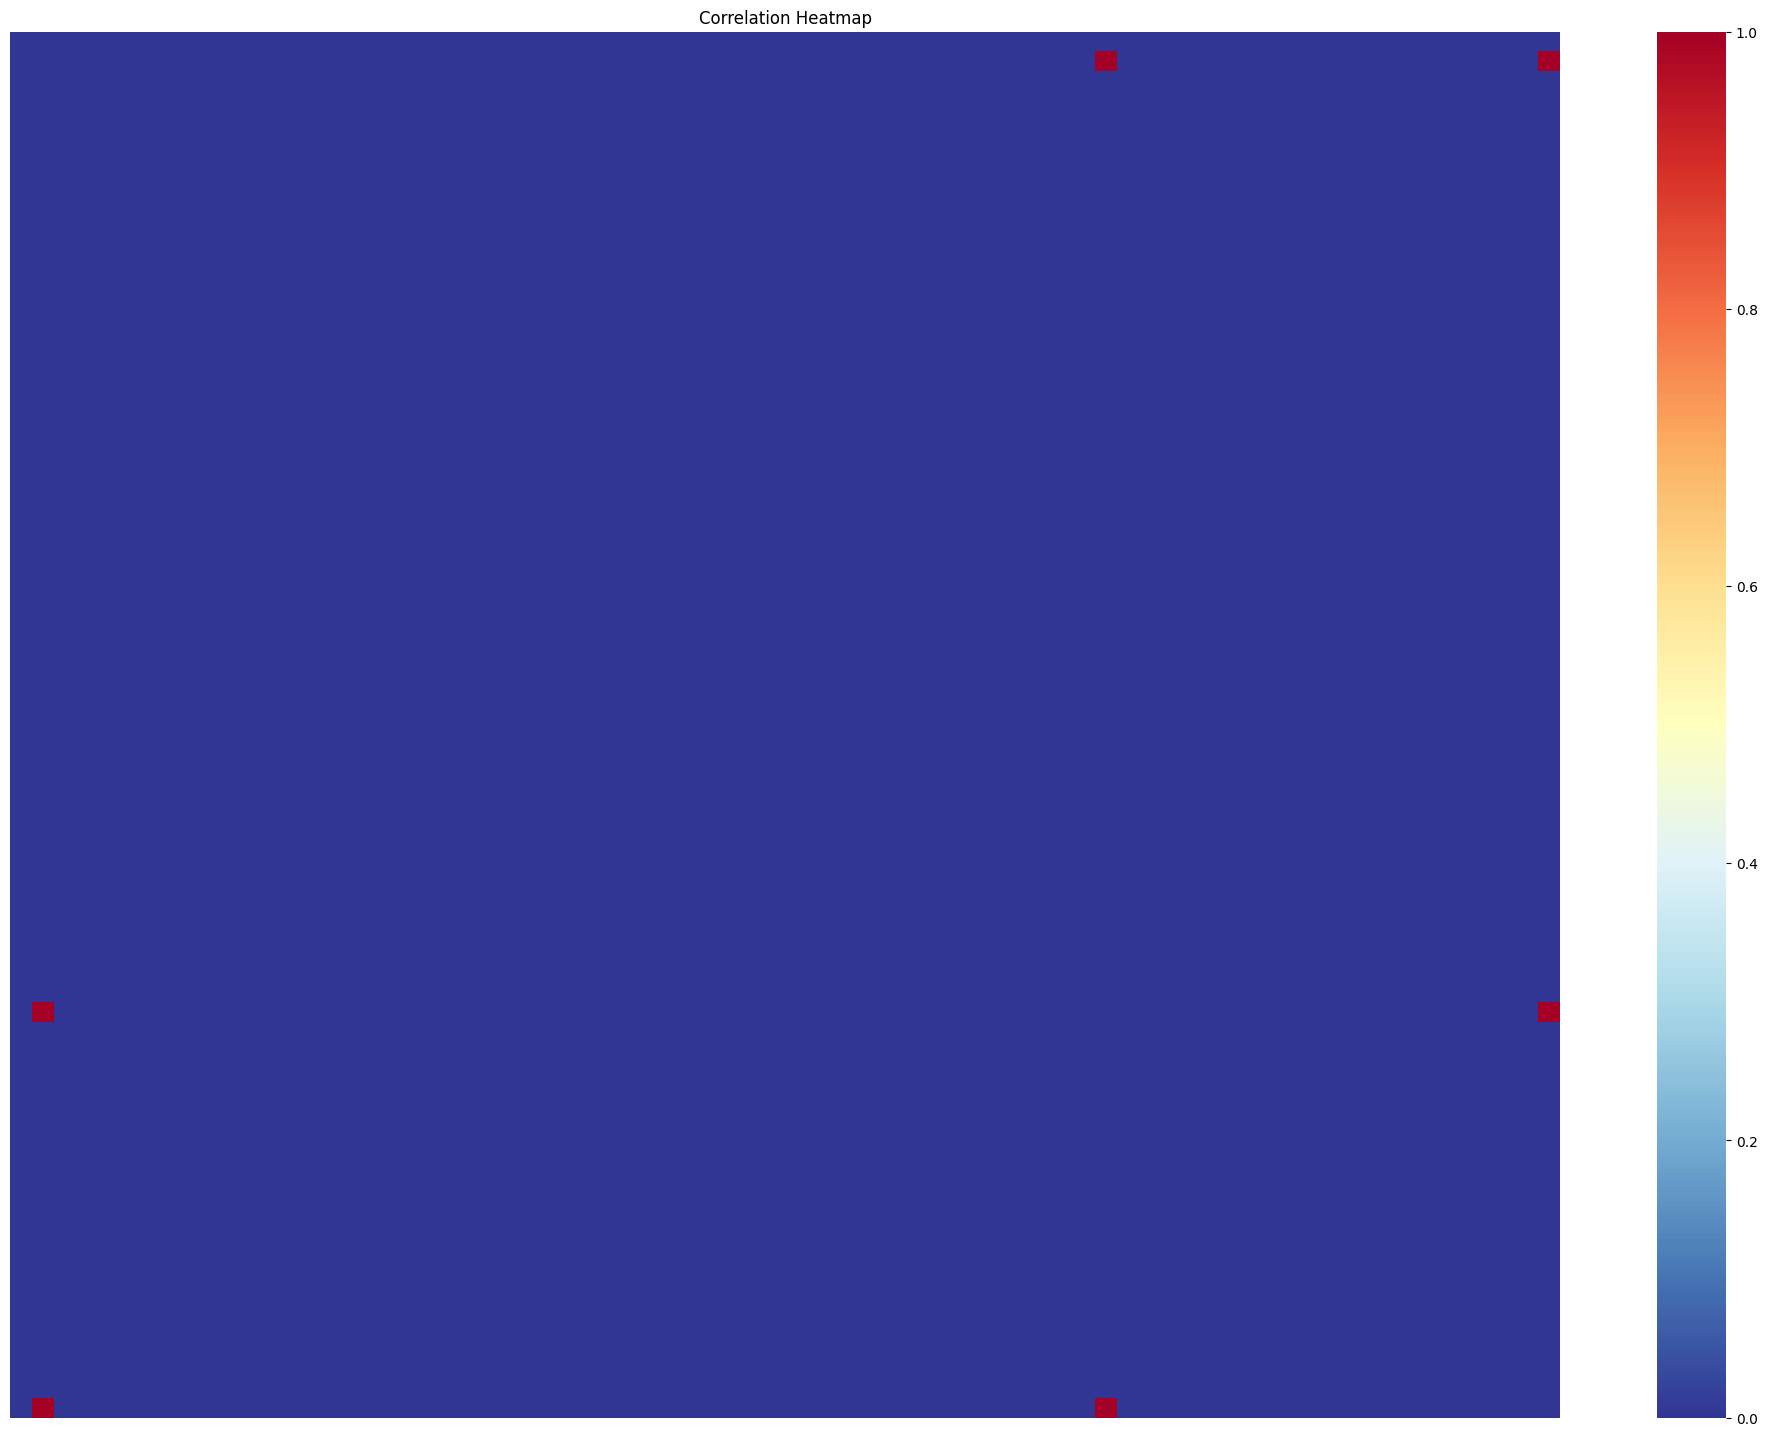

In [48]:
plot_df = pd.DataFrame(columns=sparse.columns, index=sparse.columns)
plot_df.fillna(0, inplace=True)

for row in range(len(rank_list)):
    curr_cut = rank_list[1].iloc[row]
    a = curr_cut[0]
    b = curr_cut[1]
    c = curr_cut[2]
    
#     plot_df[f'col_{a}'].loc[f'col_{a}'] += 1
    plot_df[f'col_{a}'].loc[f'col_{b}'] += 1
    plot_df[f'col_{a}'].loc[f'col_{c}'] += 1

    plot_df[f'col_{b}'].loc[f'col_{a}'] += 1
#     plot_df[f'col_{b}'].loc[f'col_{b}'] += 1
    plot_df[f'col_{b}'].loc[f'col_{c}'] += 1

    plot_df[f'col_{c}'].loc[f'col_{a}'] += 1
    plot_df[f'col_{c}'].loc[f'col_{b}'] += 1
#     plot_df[f'col_{c}'].loc[f'col_{c}'] += 1

    if row == 0:
        display(plot_df)
        plot_heatmap(plot_df)

In [31]:
unique_tripltes = pd.DataFrame(rank_list[1].value_counts()).reset_index()
unique_tripltes.rename(columns={1: 'count', 'index':'triplet'}, inplace=True)

rounds = []
for row in range(len(unique_tripltes)):
    triplet = str(unique_tripltes['triplet'].iloc[row])
    rounds.append(rank_list[rank_list[1].astype(str)==triplet]['cut_round'].values)
    
unique_tripltes['rounds']=rounds
unique_tripltes

,triplet,count,rounds
0,"[3, 4, 66]",2,"[12, 13]"
1,"[24, 61, 67]",1,[1]
2,"[65, 66, 75]",1,[14]
3,"[4, 79, 90]",1,[14]
4,"[6, 8, 93]",1,[14]
...,...,...,...
1994,"[15, 72, 78]",1,[7]
1995,"[25, 67, 99]",1,[7]
1996,"[33, 70, 76]",1,[7]
1997,"[7, 14, 15]",1,[7]


In [158]:
df.head(2)

,0,1,2,3,4,5,prev_selected
0,0,"[0, 2, 9]",0.003574,"(0.6301528327749935, 0.6426488233393189, 0.602...","[0, 2, 9, 139, 146, 594]",-6.968432,0
1,1,"[0, 2, 16]",0.056513,"(0.6301528327749935, 0.6426488233393189, 0.547...","[0, 2, 16, 139, 153, 1000]",-3.700533,0


In [173]:
df = pd.read_csv('temp_files/data_main_20.csv', index_col=0)

df['prev_selected'] = df['1'].astype(str).isin(unique_tripltes['triplet'].astype(str)).astype(int)

selected_rows = df['prev_selected'] == 1
triplets = df.loc[selected_rows, '1'].astype(str)
matching_counts = unique_tripltes.loc[unique_tripltes['triplet'].astype(str).isin(triplets), 'count'].values
df.loc[selected_rows, 'prev_selected'] = df.loc[selected_rows, 'prev_selected'] * matching_counts
df

,0,1,2,3,4,5,prev_selected
0,2,"[0, 2, 17]",0.020681,"(0.6225299060456687, 0.6665981414595601, 0.168...","[0, 2, 17, 139, 154, 1054]",-2.977479,0
1,3,"[0, 2, 24]",0.003956,"(0.6225299060456687, 0.6665981414595601, 0.684...","[0, 2, 24, 139, 161, 1404]",-4.178744,0
2,5,"[0, 2, 39]",0.022474,"(0.6225299060456687, 0.6665981414595601, 0.656...","[0, 2, 39, 139, 176, 1989]",-0.625578,0
3,6,"[0, 2, 42]",0.001207,"(0.6225299060456687, 0.6665981414595601, 0.702...","[0, 2, 42, 139, 179, 2079]",-1.240100,0
4,13,"[0, 8, 37]",0.001765,"(0.6225299060456687, 0.2868184115774006, 0.645...","[0, 8, 37, 532, 561, 1924]",-4.563306,0
...,...,...,...,...,...,...,...
1525,6595,"[60, 62, 67]",0.019959,"(0.35017086953158183, 0.6447341481349177, 0.58...","[2430, 2432, 2437, 2449, 2454, 2479]",-3.974843,1
1526,6597,"[61, 65, 68]",0.018605,"(0.5925335382698518, 0.21485712039117838, 0.60...","[2440, 2444, 2447, 2470, 2473, 2482]",-3.306477,0
1527,6601,"[62, 65, 66]",0.001539,"(0.6447341481349177, 0.21485712039117838, 0.82...","[2449, 2452, 2453, 2470, 2471, 2475]",-3.608158,0
1528,6603,"[63, 64, 68]",0.048250,"(0.392497563510192, 0.29872262525008497, 0.608...","[2457, 2458, 2462, 2464, 2468, 2482]",-0.433125,0
